In [5]:
from nengo_extras.vision import Gabor, Mask
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import rotate

In [ ]:
n_hid=5000
degrees = 6

In [ ]:
rng = np.random.RandomState(9)
# linear filter used for edge detection as encoders, more plausible for human visual system
encoders = Gabor().generate(n_hid/60, (11, 11), rng=rng)
encoders = Mask((28, 28)).populate(encoders, rng=rng, flatten=True)

#Check the encoders were correctly made
plt.imshow(encoders[0].reshape(28, 28), vmin=encoders[0].min(), vmax=encoders[0].max(), cmap='gray')

In [ ]:
rotated_encoders = encoders.copy()

for encoder in encoders:
    for i in range(59):
        rotated_encoders = np.append(rotated_encoders, [rotate(encoder.reshape(28,28),degrees*i,reshape = False).ravel()],axis =0)
    

In [ ]:
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(rotated_encoders[6*83+i].reshape(28,28),cmap='gray')


plt.show()

In [ ]:
extra_encoders = Gabor().generate(n_hid - len(rotated_encoders), (11, 11), rng=rng)
extra_encoders = Mask((28, 28)).populate(extra_encoders, rng=rng, flatten=True)
all_encoders = np.append(rotated_encoders, extra_encoders, axis =0)


In [ ]:
print(len(all_encoders))

In [39]:
import numpy as np

from nengo.dists import Choice, Uniform, DistributionParam
from nengo.params import FrozenObject, TupleParam
from nengo.utils.compat import range

class Mask(FrozenObject):
    """Describes a sparse receptive-field mask for encoders.
    Parameters
    ----------
    image_shape : 2- or 3-tuple
        Shape of the input image, either (height, witdh) or
        (channels, height, width).
    """

    image_shape = TupleParam('image_shape', length=3)

    def __init__(self, image_shape):
        image_shape = ((1,) + tuple(image_shape) if len(image_shape) == 2 else
                       image_shape)
        self.image_shape = image_shape

    def _positions(self, n, shape, rng):
        diff_shape = np.asarray(self.image_shape[1:]) - np.asarray(shape) + 1
        
        # find random positions for top-left corner of each RF
        i = rng.randint(low=0, high=diff_shape[0], size=n)
        j = rng.randint(low=0, high=diff_shape[1], size=n)
        return i, j

    def generate(self, n, shape, rng=np.random, flatten=False):
        shape = np.asarray(shape)
        assert shape.ndim == 1 and shape.shape[0] == 2

        i, j = self._positions(n, shape, rng)
        mask = np.zeros((n,) + self.image_shape, dtype='bool')
        for k in range(n):
            mask[k, :, i[k]:i[k]+shape[0], j[k]:j[k]+shape[1]] = True

        return mask.reshape(n, -1) if flatten else mask

    def populate(self, filters, rng=np.random, flatten=False):
        filters = np.asarray(filters)
        assert filters.ndim in [3, 4]
        n, shape = filters.shape[0], filters.shape[-2:]
        channels = 1 if filters.ndim == 3 else filters.shape[1]
        assert channels == self.image_shape[0]

        i, j = self._positions(n, shape, rng)
        print(n)
        print(shape)
        print(rng)
        print(i)
        print(j)
        i=[9,0,0,0]
        j=[0,0,0,0]
        print(i)
        print(j)
        
        
        output = np.zeros((n,) + self.image_shape, dtype=filters.dtype)
        for k in range(n):
            output[k, :, i[k]:i[k]+shape[0], j[k]:j[k]+shape[1]] = filters[k]

        return output.reshape(n, -1) if flatten else output

In [40]:
rng = np.random.RandomState(9)
encoders = Gabor().generate(4, (11, 11), rng=rng)
encoders = Mask((28, 28)).populate(encoders, rng=rng, flatten=True)

4
(11L, 11L)
[ 3 11  5  6]
[ 9 16 17  8]
[9, 0, 0, 0]
[0, 0, 0, 0]


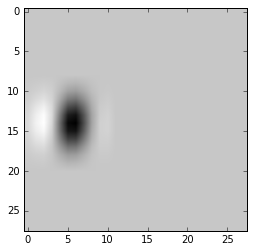

In [41]:
plt.imshow(encoders[0].reshape(28, 28), vmin=encoders[0].min(), vmax=encoders[0].max(), cmap='gray')